In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams["figure.figsize"]=(12,8)


In [2]:
# changing directory
os.chdir("C:\\Users\\Dayanand\\Desktop\\DataScience\\dsp1\\DataSets")

# loading file
rawData=pd.read_csv("movies.csv")


In [3]:
# NULL values check
rawData.columns
rawData.head()
rawData.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# NUll values treatment
# budget
tmpMedian=rawData["budget"].median()
rawData["budget"].fillna(tmpMedian,inplace=True)
rawData["budget"].isnull().sum()

0

In [7]:
# gross
tempMedian=rawData["gross"].median()
rawData["gross"].fillna(tempMedian,inplace=True)
rawData["gross"].isnull().sum()

0

In [8]:
#company-data type (object)
tempMode=rawData["company"].mode()[0]
rawData["company"].fillna(tempMode,inplace=True)
rawData["company"].isnull().sum()

0

In [9]:
# runtime-float64
tempMedian=rawData["runtime"].median()
rawData["runtime"].fillna(tempMedian,inplace=True)
rawData["runtime"].isnull().sum()

0

In [22]:
#rating
tempMode=rawData["rating"].mode()[0]
rawData["rating"].fillna(tempMode,inplace=True)
rawData["rating"].isna().sum()

#released
tempMode=rawData["released"].mode()[0]
rawData["released"].fillna(tempMode,inplace=True)
rawData["released"].isna().sum()
# score
tempMedian=rawData["score"].median()
rawData["score"].fillna(tempMedian,inplace=True)
rawData["score"].isna().sum()

# votes
tempMedian=rawData["votes"].median()
rawData["votes"].fillna(tempMedian,inplace=True)
rawData["votes"].isna().sum()

#writer
tempMode=rawData["writer"].mode()[0]
rawData["writer"].fillna(tempMode,inplace=True)
rawData["writer"].isna().sum()

#star
tempMode=rawData["star"].mode()[0]
rawData["star"].fillna(tempMode,inplace=True)
rawData["star"].isna().sum()

#country
tempMode=rawData["country"].mode()[0]
rawData["country"].fillna(tempMode,inplace=True)
rawData["country"].isna().sum()



0

In [24]:
# final check of NULL values
for col in rawData.columns:
    per_missing=np.mean(rawData[col].isnull())
    print(per_missing)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [26]:
# checking data types
rawData.dtypes

# change data types
rawData["budget"]=rawData["budget"].astype("int64")
rawData["score"]=rawData["score"].astype("int64")
rawData["votes"]=rawData["votes"].astype("int64")
rawData["gross"]=rawData["gross"].astype("int64")
rawData["runtime"]=rawData["runtime"].astype("int64")

# checking data types
rawData.dtypes


name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [27]:
# Create coorect year column
rawData.describe
rawData.head()
rawData["year_correct"]=rawData["released"].astype("str").str[9:13]


In [ ]:
# drop duplicates
#rawData["company"].sort_values(ascending=False)
rawData.drop_duplicates()


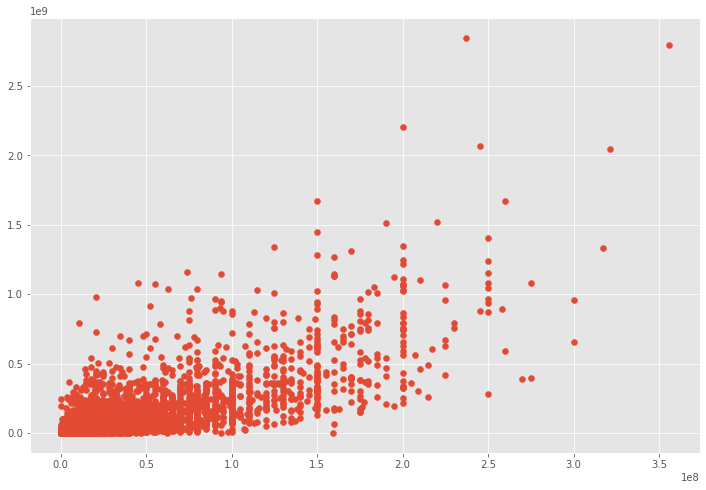

<AxesSubplot:xlabel='budget', ylabel='gross'>

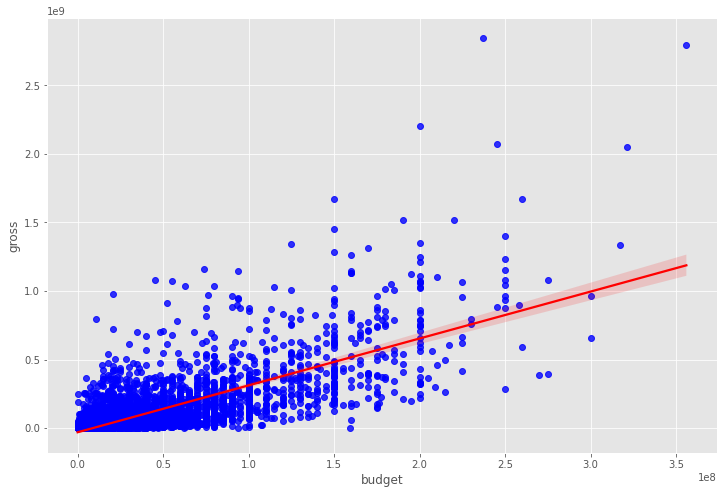

In [28]:
# budget vs gross
plt.scatter(x=rawData["budget"],y=rawData["gross"])
plt.show()
df=rawData.copy()
sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"blue"},
            line_kws={"color":"red"})


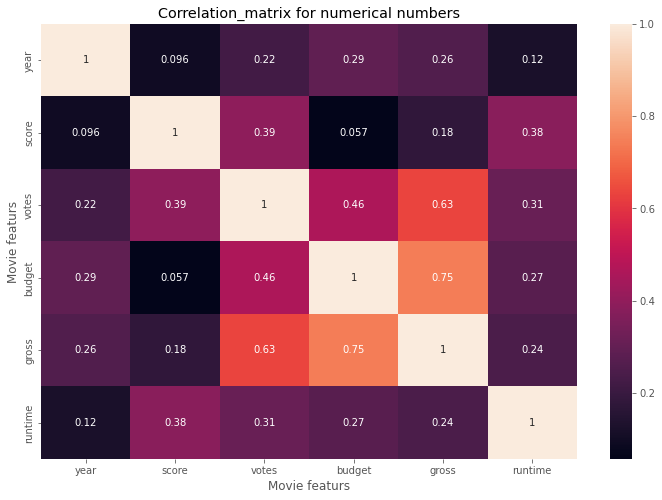

In [29]:
# let's start looking at correlation
df.corr() # by default-perason

# visualization of correlation matrix
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation_matrix for numerical numbers")
plt.xlabel("Movie featurs")
plt.ylabel("Movie featurs")
plt.show()


In [30]:
df_numerized=df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=="object"):
        df_numerized[col_name]=df_numerized[col_name].astype("category")
        df_numerized[col_name]=df_numerized[col_name].cat.codes


df_numerized.head()
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


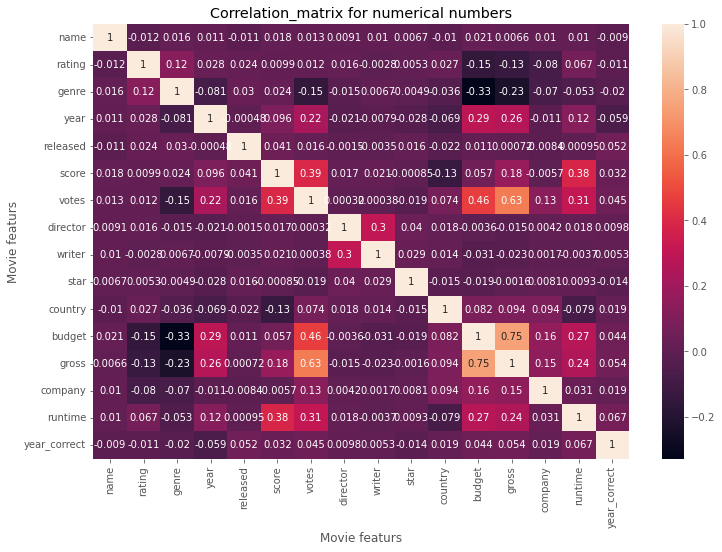

In [33]:
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation_matrix for numerical numbers")
plt.xlabel("Movie featurs")
plt.ylabel("Movie featurs")
plt.show()




In [32]:
corre_pairs=correlation_matrix.unstack
corre_pairs


<bound method DataFrame.unstack of                   name    rating     genre      year  released     score  \
name          1.000000 -0.012441  0.016355  0.011453 -0.011087  0.017825   
rating       -0.012441  1.000000  0.123465  0.027931  0.023643  0.009904   
genre         0.016355  0.123465  1.000000 -0.081261  0.029997  0.023595   
year          0.011453  0.027931 -0.081261  1.000000 -0.000484  0.096100   
released     -0.011087  0.023643  0.029997 -0.000484  1.000000  0.041072   
score         0.017825  0.009904  0.023595  0.096100  0.041072  1.000000   
votes         0.013056  0.012286 -0.145291  0.222573  0.015980  0.393339   
director      0.009079  0.016255 -0.015258 -0.020795 -0.001492  0.016695   
writer        0.010018 -0.002795  0.006746 -0.007901 -0.003461  0.021059   
star          0.006749  0.005314 -0.004856 -0.027745  0.015550 -0.000845   
country      -0.010425  0.026930 -0.035896 -0.069423 -0.022042 -0.127204   
budget        0.020921 -0.148543 -0.328484  0.291690 